### Applying everest 2.0 PLD manually to detrend K2 light curves 
4 April 2019

See [EVEREST documentation](https://rodluger.github.io/everest/detrender.html#everest.detrender.rPLD)

In [1]:
from analysis import *

In [35]:
# which channels have most of our AGN on them?
agn = pd.read_csv('./object_keys/c8_agn_w_redshift.csv')
ch = np.array(agn['CHANNEL']).astype(int)

# sort
s = np.argsort(np.bincount(ch))

# print sorted by occurence (low->high)
print(s)

[ 0 18 80 23 65 19 63 71  8  6  5  4 20 32  7 17 76 41 68 64 45 58 49 34
 25 27  3 11 40 51 50  1  2 46  9 12 24 39 54 78 70 15 16 33 21 31 22 56
 67 82 61 72 74 57 77 84 52 10 44 43 26 28 38 37 53 81 13 79 14 42 66 62
 48 29 60 36 55 30 73 83 47 59 75 69 35]


In [3]:
# load in ed shaya objects
shaya = pd.read_csv('./object_keys/c8_shaya.csv')
test_epic = shaya['EPIC ID'][100]

Test out on objects that aren't on EVEREST MAST database with both rPLD (regular PLD) and nPLD(PLD with neighboring star calculations):

In [10]:
%%time
rpld = everest.detrender.rPLD(test_epic, season=8)

CPU times: user 448 ms, sys: 3.06 ms, total: 451 ms
Wall time: 449 ms


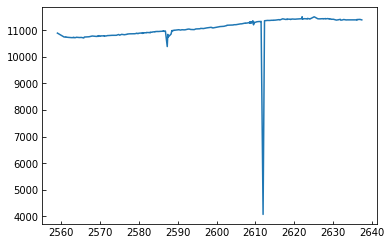

In [31]:
sortingr = np.array(rpld.time[~rpld.mask]).argsort()
plt.plot(rpld.time[~rpld.mask][sortingr], rpld.flux[~rpld.mask][sortingr])

In [22]:
%%time
npld = everest.detrender.nPLD(test_epic, season=8)

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


CPU times: user 41min 50s, sys: 13min 28s, total: 55min 19s
Wall time: 20min 41s


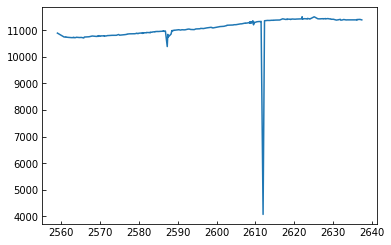

In [23]:
sorting = np.array(npld.time[~npld.mask]).argsort()
plt.plot(npld.time[~npld.mask][sorting], rpld.flux[~npld.mask][sorting])

---
### Look at PSDs (before and after)


In [24]:
# get the raw light curves
tpf = lk.search_targetpixelfile(test_epic, campaign=8).download() # define tpf

# get raw lightcurve
lc = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
lc_raw = lc[~spurious_cadences]

258 cadences will be ignored (bitmask=1130799)


Text(0.5, 0.98, 'EPIC 220165960, K2 Campaign 8')

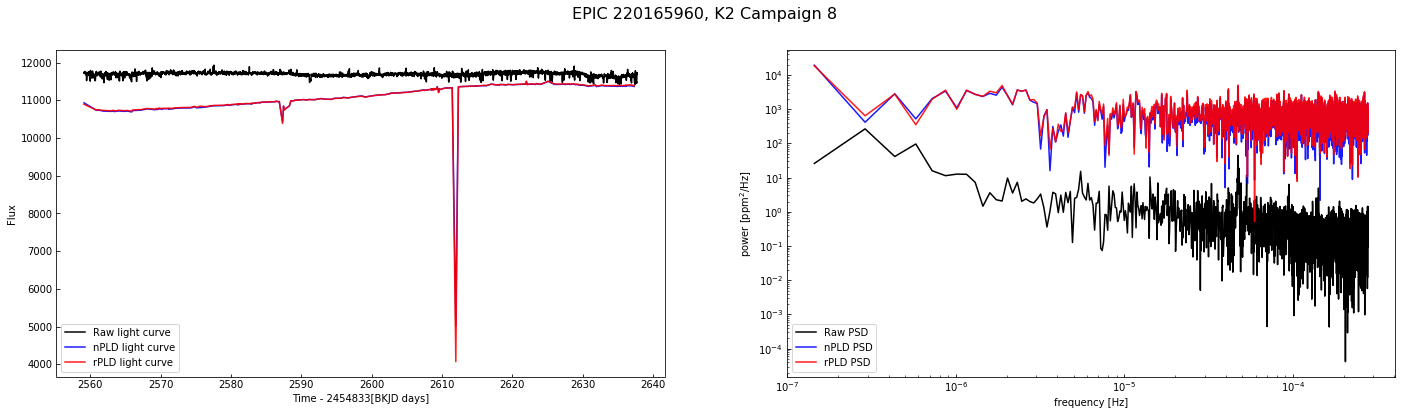

In [32]:
# plot them
fig, ax = plt.subplots(1,2, figsize=(24,6))
plot_lc_PSD(lc_raw.time, lc_raw.flux, ax[0], ax[1], l="Raw", f=k2_freq, color='k', alpha=1.0)
plot_lc_PSD(npld.time[~npld.mask][sorting], npld.flux[~npld.mask][sorting], ax[0], ax[1], l="nPLD", f=k2_freq,  color='b', alpha=0.9)
plot_lc_PSD(rpld.time[~rpld.mask][sortingr], rpld.flux[~rpld.mask][sortingr], ax[0], ax[1], l="rPLD", f=k2_freq,  color='r', alpha=0.9)
fig.suptitle("EPIC %s, K2 Campaign %s"%(test_epic,8), fontsize=16)

### Looking at an almost "non-variable" source

In [36]:
epic = 220436242

In [37]:
rpld_0 = everest.detrender.rPLD(epic, season=8)

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [38]:
npld_0 = everest.detrender.nPLD(epic, season=8)

/home/rachel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [39]:
tpf = lk.search_targetpixelfile(epic, campaign=8).download() # define tpf

# get raw lightcurve
lc = tpf.to_lightcurve(aperture_mask='all')
_, spurious_cadences = lc.flatten().remove_outliers(return_mask=True) # remove spurious cadences
lc_raw = lc[~spurious_cadences]

258 cadences will be ignored (bitmask=1130799)


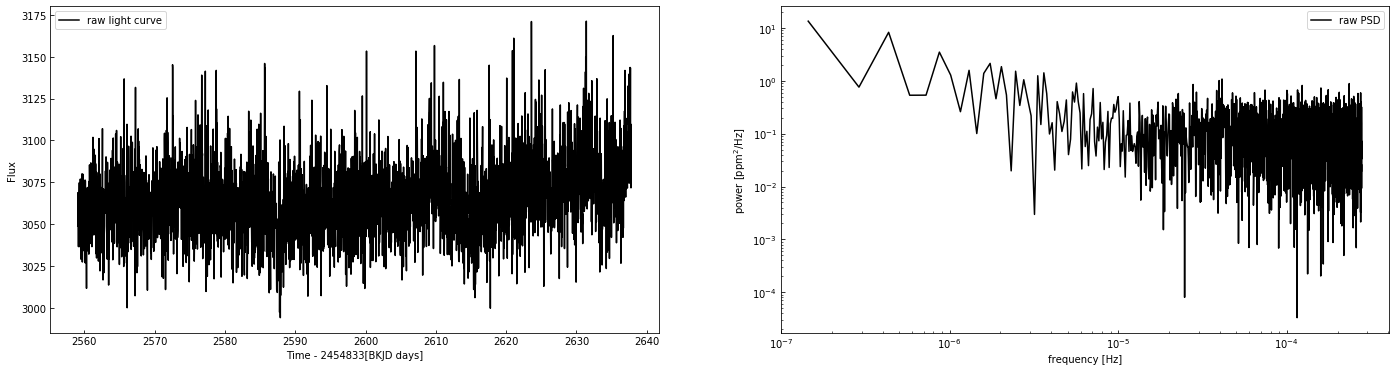

In [41]:
fig, ax = plt.subplots(1,2, figsize=(24,6))
plot_lc_PSD(lc_raw.time, lc_raw.flux, ax[0], ax[1], l="raw", f=k2_freq, color='k', alpha=1.0)

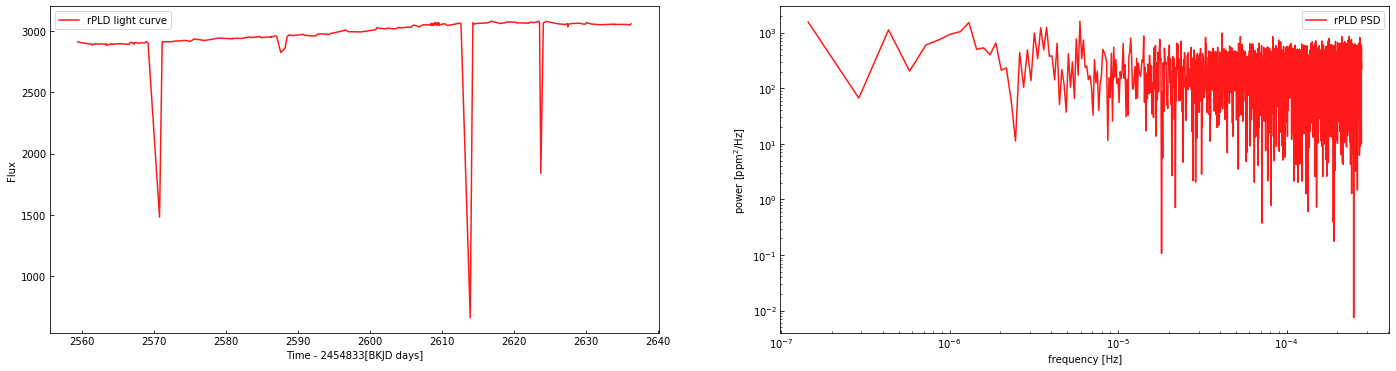

In [47]:
fig, ax = plt.subplots(1,2, figsize=(24,6))
sortingr = np.array(rpld_0.time[~rpld_0.mask]).argsort()
plot_lc_PSD(rpld_0.time[~rpld_0.mask][sortingr], rpld_0.flux[~rpld_0.mask][sortingr], ax[0], ax[1], l="rPLD", f=k2_freq,  color='r', alpha=0.9)

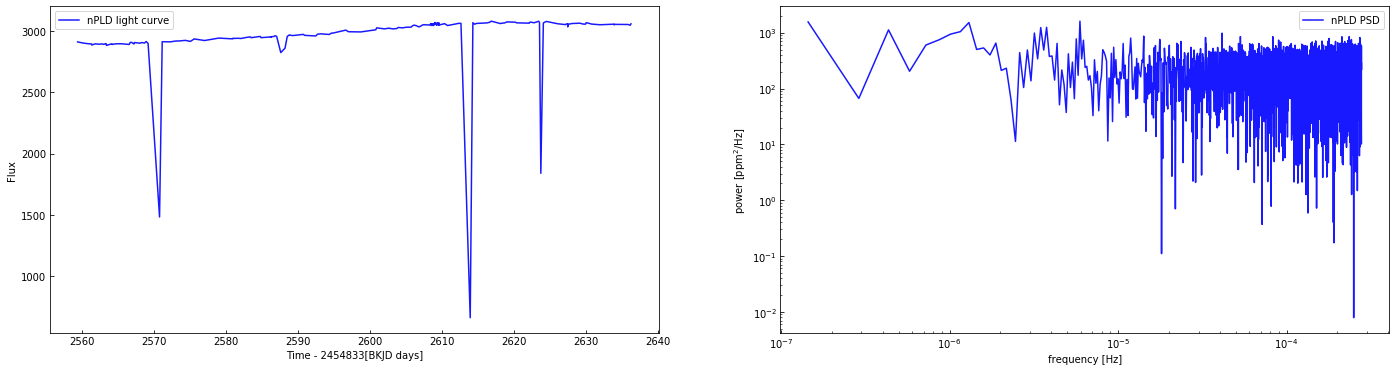

In [45]:
fig, ax = plt.subplots(1,2, figsize=(24,6))
sorting = np.array(npld_0.time[~npld_0.mask]).argsort()
plot_lc_PSD(npld_0.time[~npld_0.mask][sorting], npld_0.flux[~npld_0.mask][sorting], ax[0], ax[1], l="nPLD", f=k2_freq,  color='b', alpha=0.9)

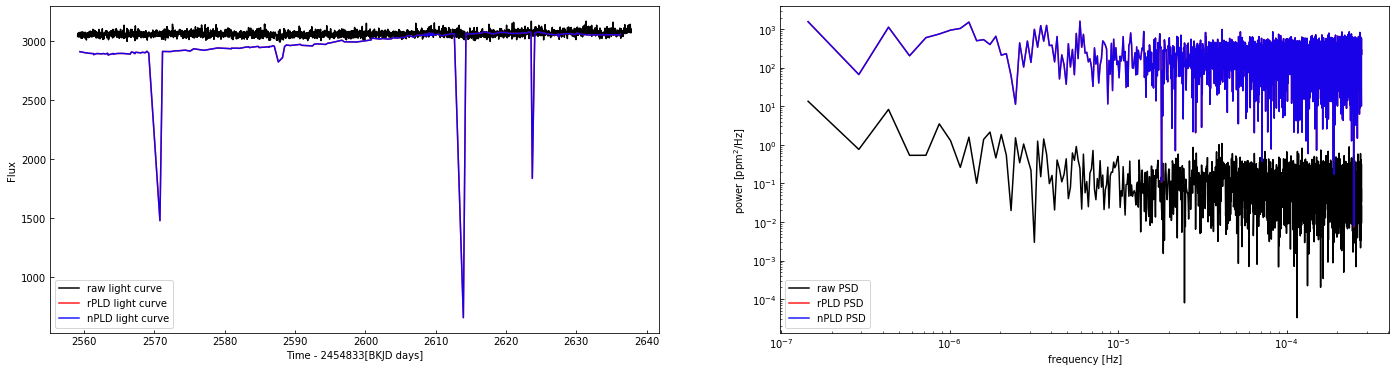

In [48]:
fig, ax = plt.subplots(1,2, figsize=(24,6))
plot_lc_PSD(lc_raw.time, lc_raw.flux, ax[0], ax[1], l="raw", f=k2_freq, color='k', alpha=1.0)
sortingr = np.array(rpld_0.time[~rpld_0.mask]).argsort()
plot_lc_PSD(rpld_0.time[~rpld_0.mask][sortingr], rpld_0.flux[~rpld_0.mask][sortingr], ax[0], ax[1], l="rPLD", f=k2_freq,  color='r', alpha=0.9)
sorting = np.array(npld_0.time[~npld_0.mask]).argsort()
plot_lc_PSD(npld_0.time[~npld_0.mask][sorting], npld_0.flux[~npld_0.mask][sorting], ax[0], ax[1], l="nPLD", f=k2_freq,  color='b', alpha=0.9)